In [ ]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")

# STAGE 2
## both conditions identical and changing 

### Import data and visualise

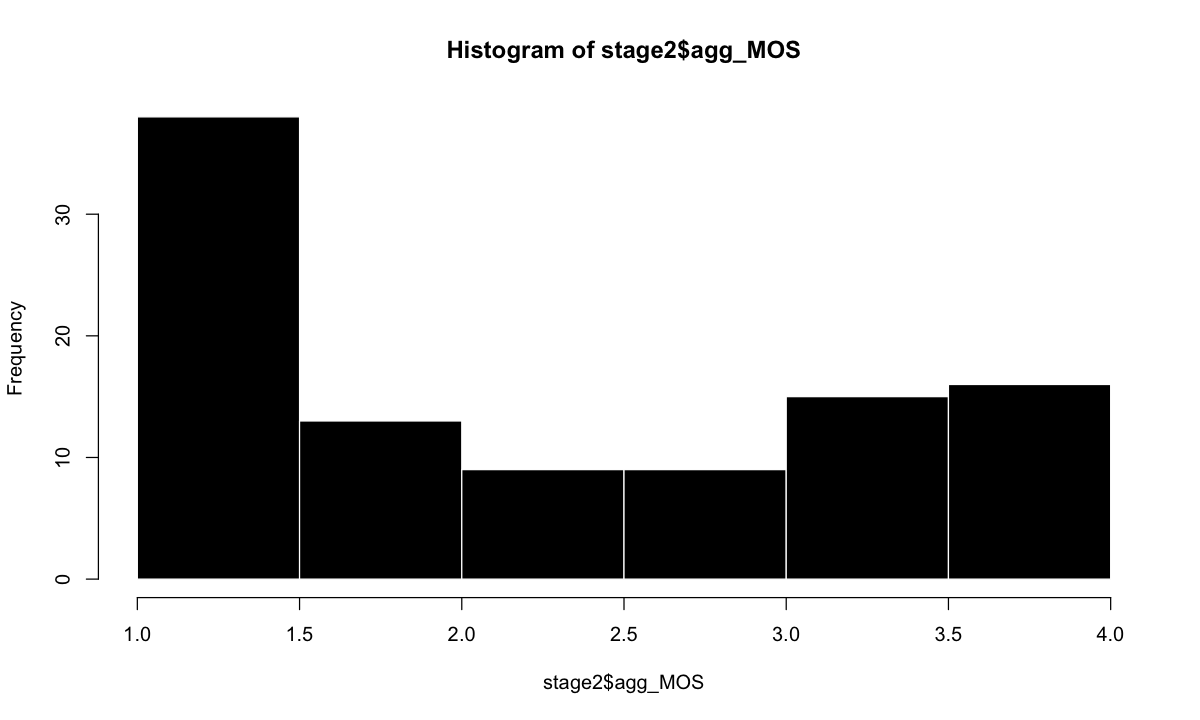

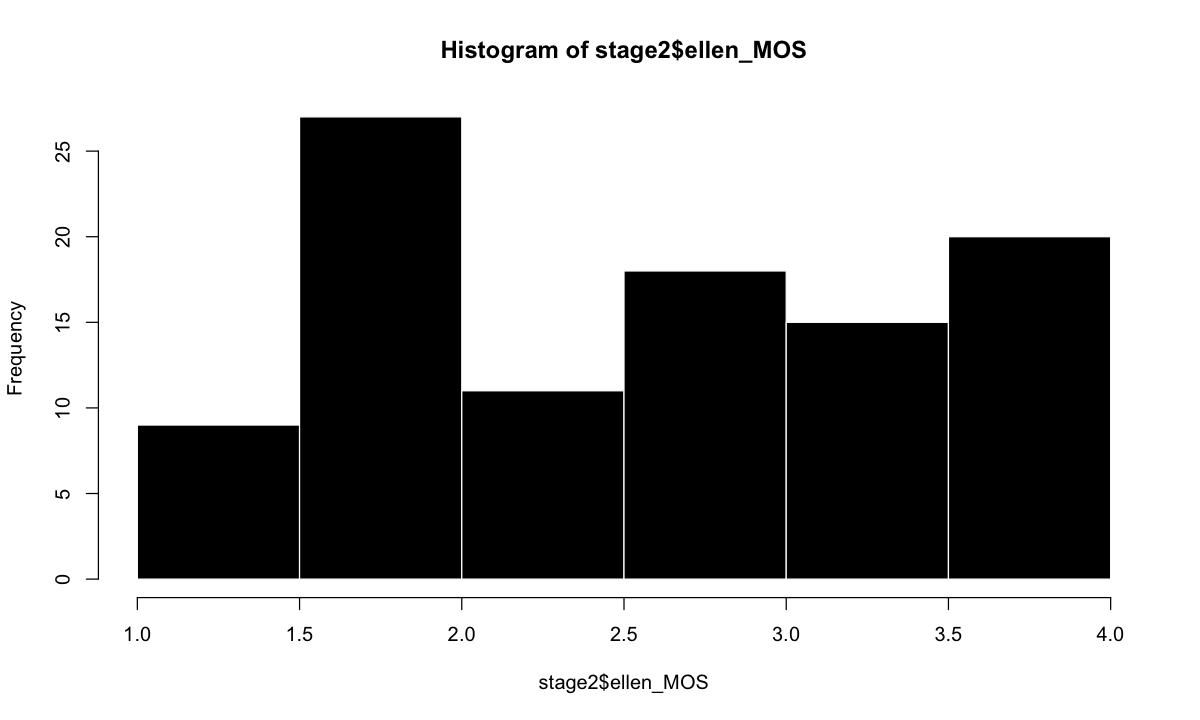

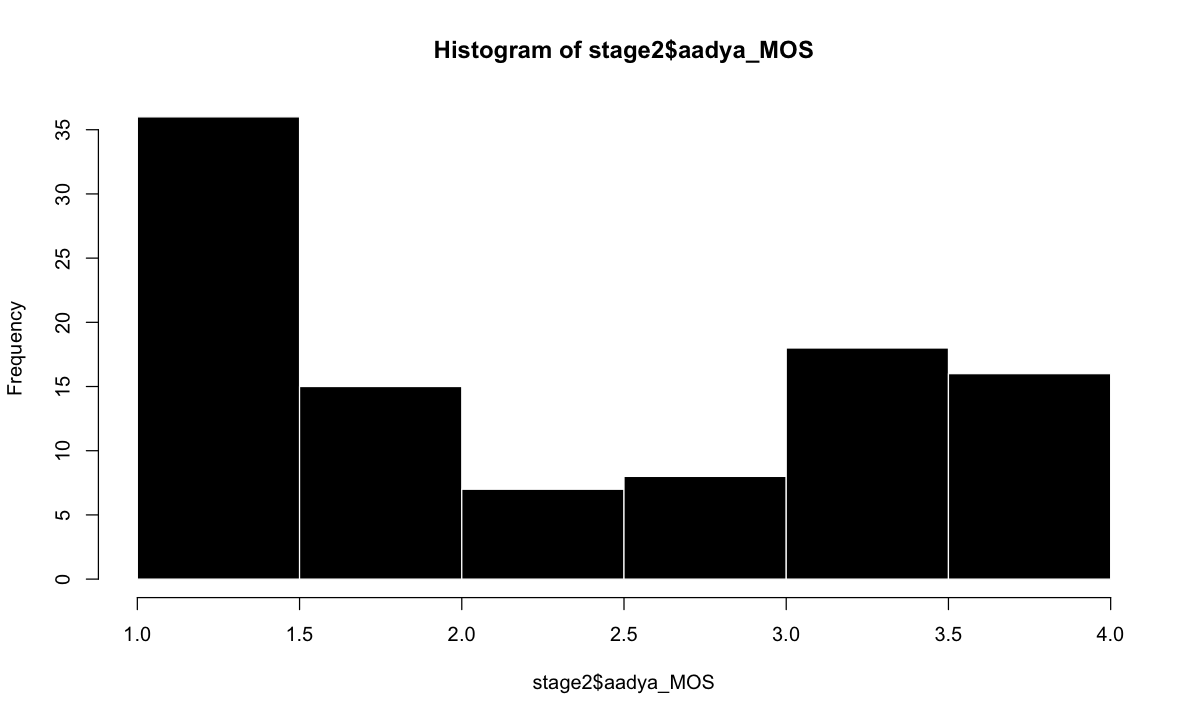

In [11]:
stage2 <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_2/stage2_regression_table.csv")
options(repr.plot.width = 10, repr.plot.height = 6)
     
par(bg = "white")
hist(stage2$agg_MOS, 
     col = "black",
     border = "white")

par(bg = "white")
hist(stage2$ellen_MOS, 
     col = "black",
     border = "white")

par(bg = "white")
hist(stage2$aadya_MOS, 
     col = "black",
     border = "white")


## general function 
### to plot a type of MOS (ellen/ aadya/ audio / video) against independent vars of upload, download, rtt

In [15]:
MOS_test<- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_2/stage2_regression_table.csv")
plot_vars_against_targ <- function(target, target_name) {
  library(ggplot2)
  #import data
  MOS_test <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/stage_2/stage2_regression_table.csv") 
  #perform fit
  fit <- lm(target ~ log(aadya_up) + log(aadya_down) + aadya_rtt, MOS_test)
  #print summary of variables and significance
  print(summary(fit))

  #set up plotting environment
  options(repr.plot.width = 10, repr.plot.height = 6) #fix size
  par(bg = "white")  # set background color to white

  # Scatter plot for aadya_up
  p1 <- ggplot(MOS_test, aes(x = aadya_up, y = target)) +
    geom_point(color = "blue") +
    labs(title = paste(target_name, "vs aadya_up"), x = "aadya_up", y = target_name) +
    theme_minimal()
  print(p1)
  p2 <- ggplot(MOS_test, aes(x = aadya_down, y = target)) +
    geom_point(color = "purple") +
    labs(title = paste(target_name, "vs aadya_down"), x = "aadya_down", y = target_name) +
    theme_minimal()
  print(p2)
  p3 <- ggplot(MOS_test, aes(x = aadya_rtt, y = target)) +
    geom_point(color = "orange") +
    labs(title = paste(target_name, "vs aadya_rtt"), x = "aadya_rtt", y = target_name) +
    theme_minimal()
  print(p3)
  #plots the predicted values against the real values for each datapoint
  predictions <- predict(fit, MOS_test)
  plot(predict(fit, MOS_test), target, main= paste("model performance for", target_name))
}

## execution cells 
### regression of specific MOSs against up/down/rtt


Call:
lm(formula = target ~ log(aadya_up) + log(aadya_down) + aadya_rtt, 
    data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15396 -0.28102 -0.01891  0.27027  0.89907 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3.0899216  0.4681928  -6.600 2.26e-09 ***
log(aadya_up)    0.6109272  0.0325107  18.792  < 2e-16 ***
log(aadya_down)  0.1059084  0.0408701   2.591   0.0111 *  
aadya_rtt       -0.0012457  0.0002056  -6.060 2.66e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.466 on 96 degrees of freedom
Multiple R-squared:  0.8051,	Adjusted R-squared:  0.799 
F-statistic: 132.2 on 3 and 96 DF,  p-value: < 2.2e-16



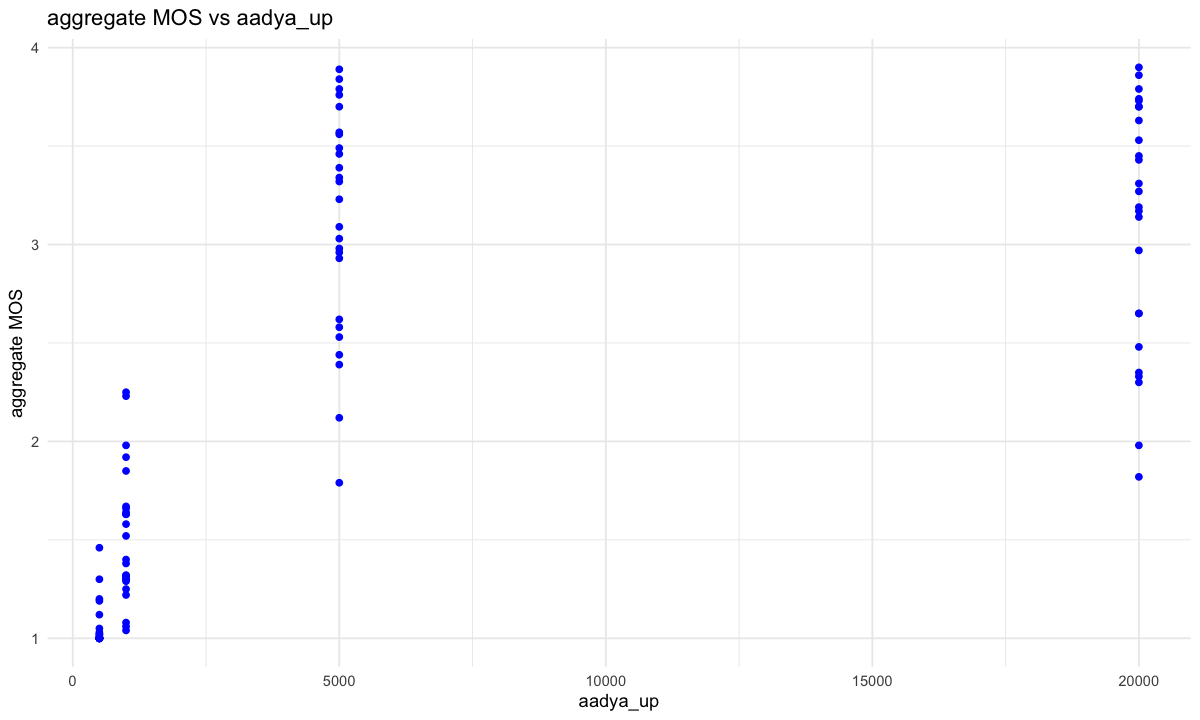

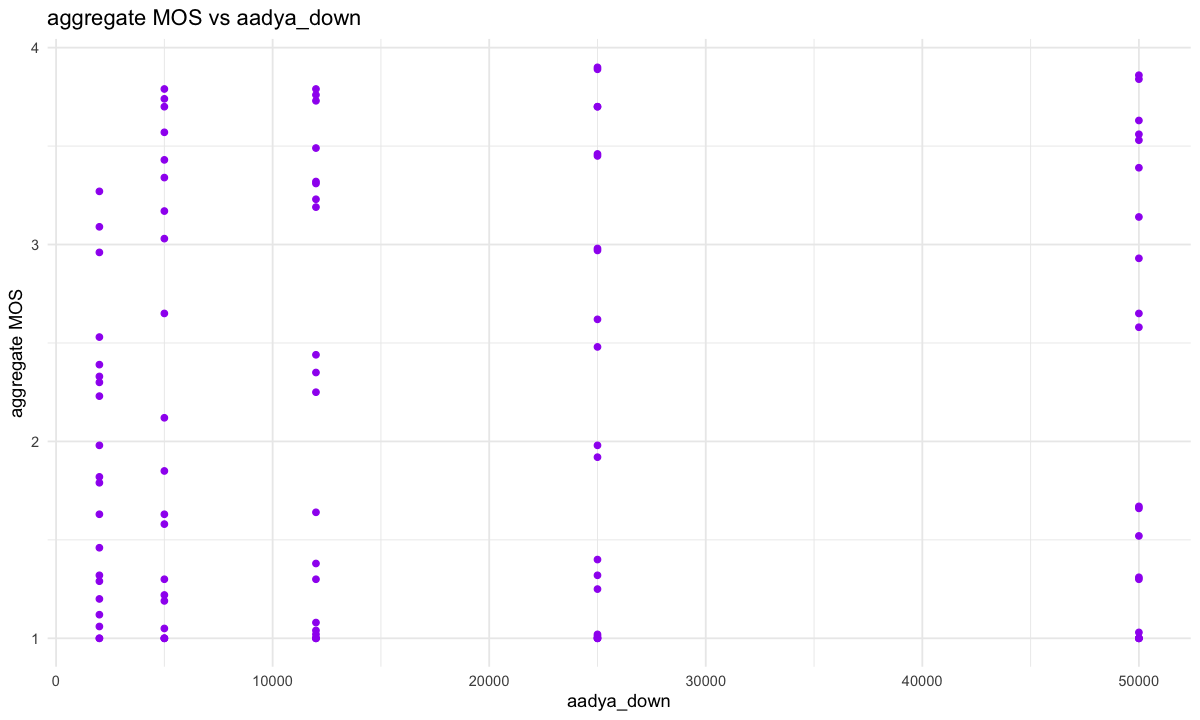

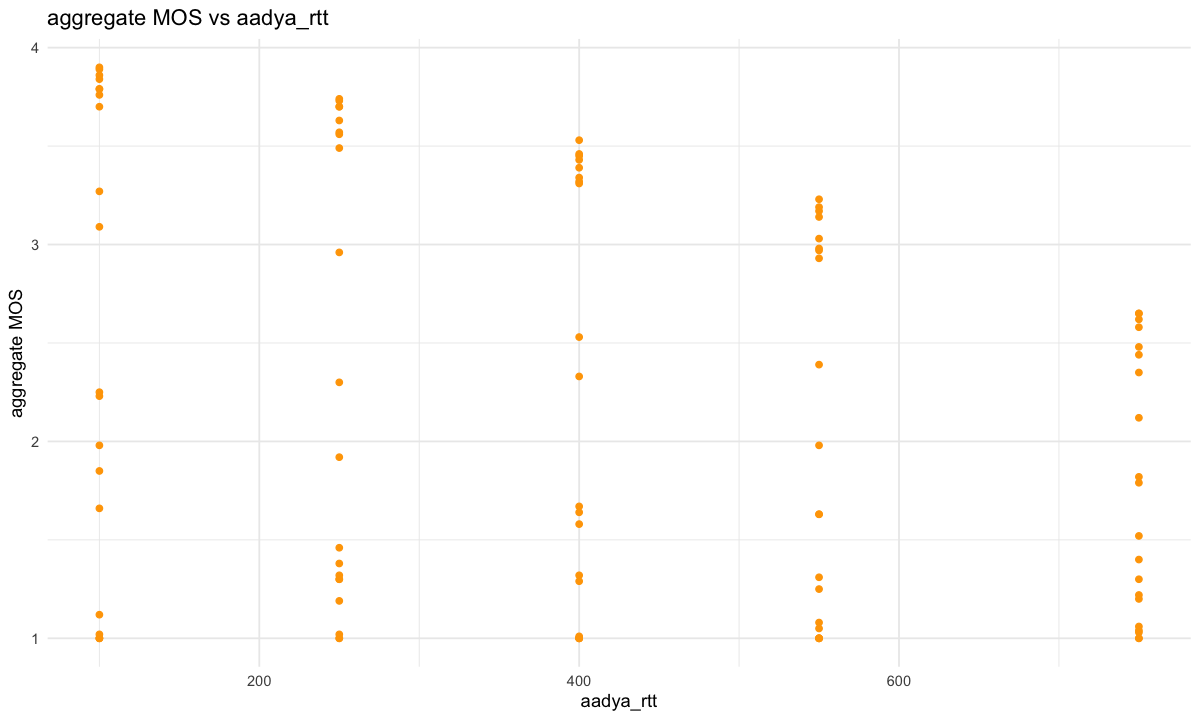

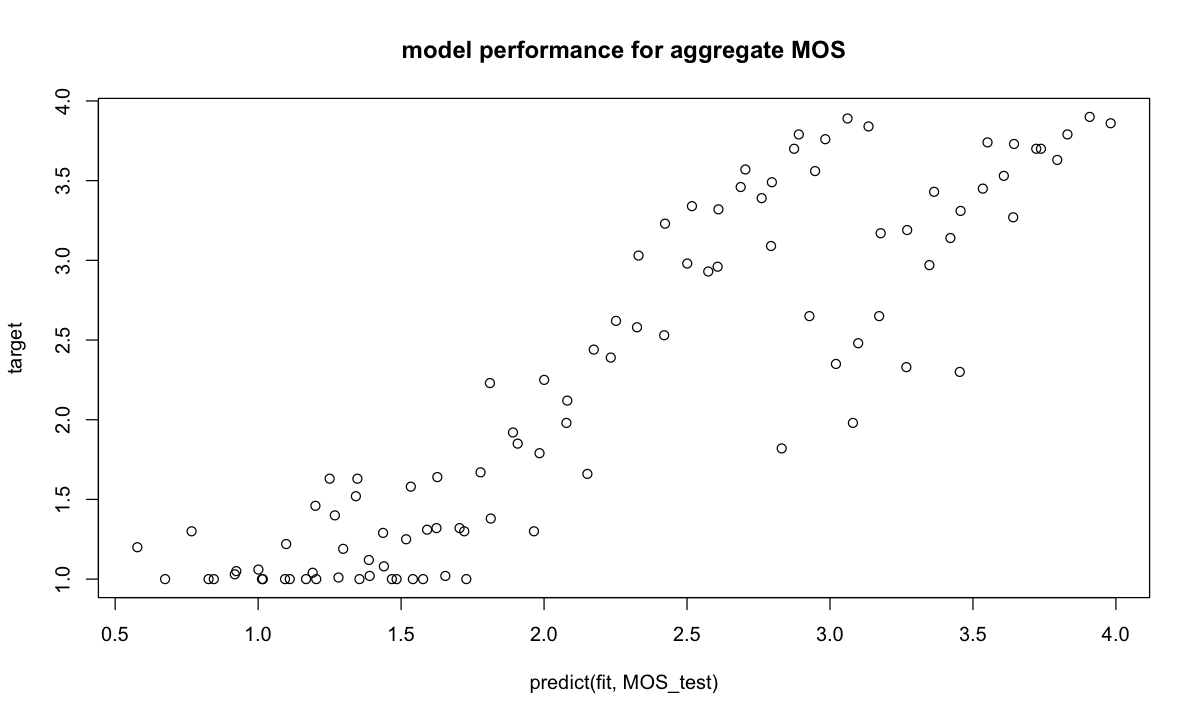

In [16]:
plot_vars_against_targ(stage2$agg_MOS, "aggregate MOS")


Call:
lm(formula = target ~ log(aadya_up) + log(aadya_down) + aadya_rtt, 
    data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0694 -0.2738 -0.0040  0.2762  1.1057 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.8487103  0.4939233  -5.768 9.78e-08 ***
log(aadya_up)    0.5684153  0.0342974  16.573  < 2e-16 ***
log(aadya_down)  0.1376297  0.0431162   3.192  0.00191 ** 
aadya_rtt       -0.0019651  0.0002169  -9.062 1.54e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4916 on 96 degrees of freedom
Multiple R-squared:  0.7926,	Adjusted R-squared:  0.7862 
F-statistic: 122.3 on 3 and 96 DF,  p-value: < 2.2e-16



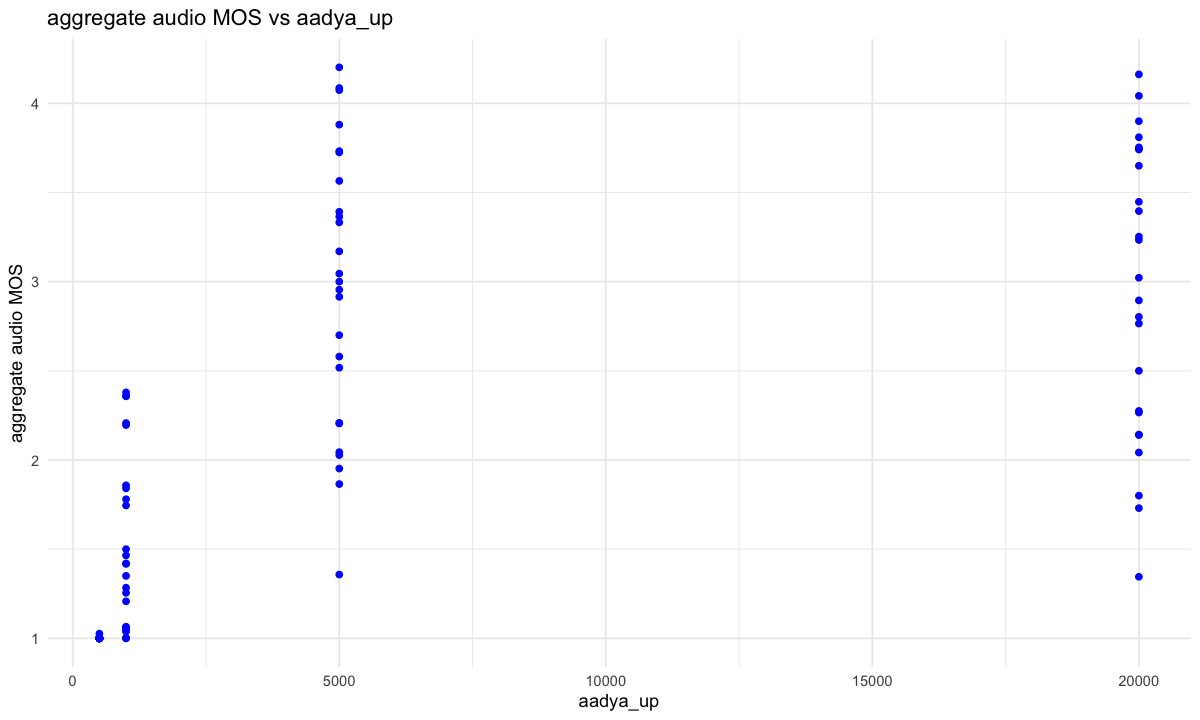

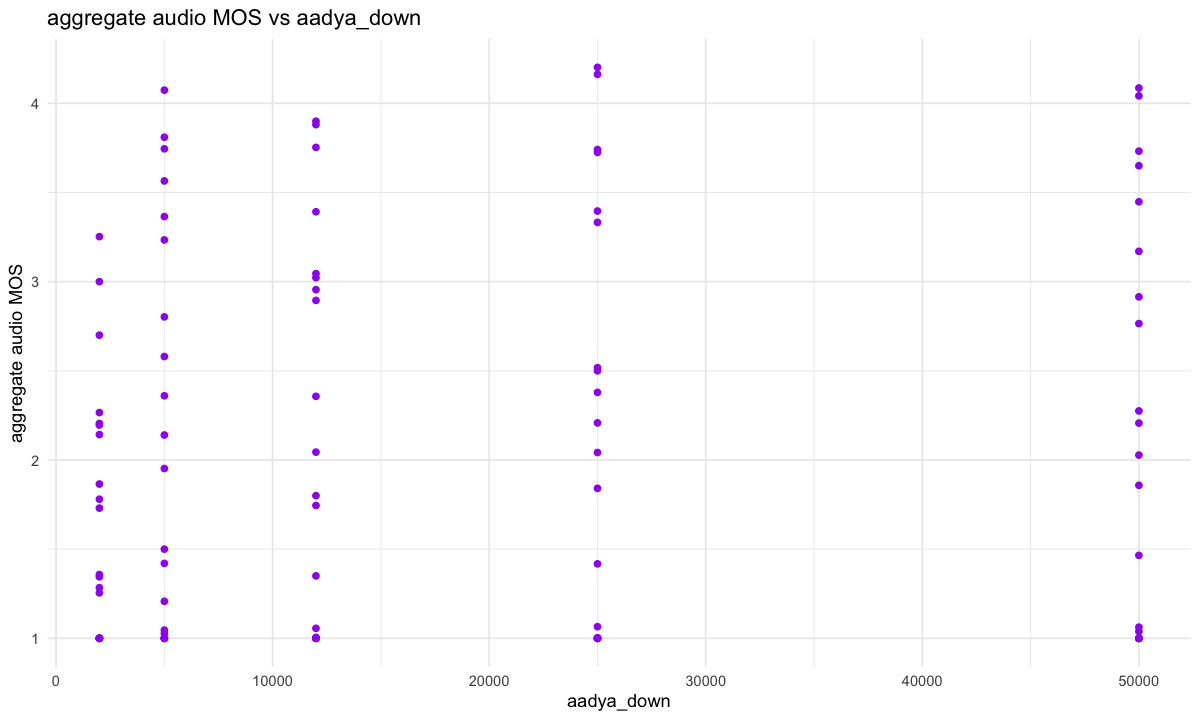

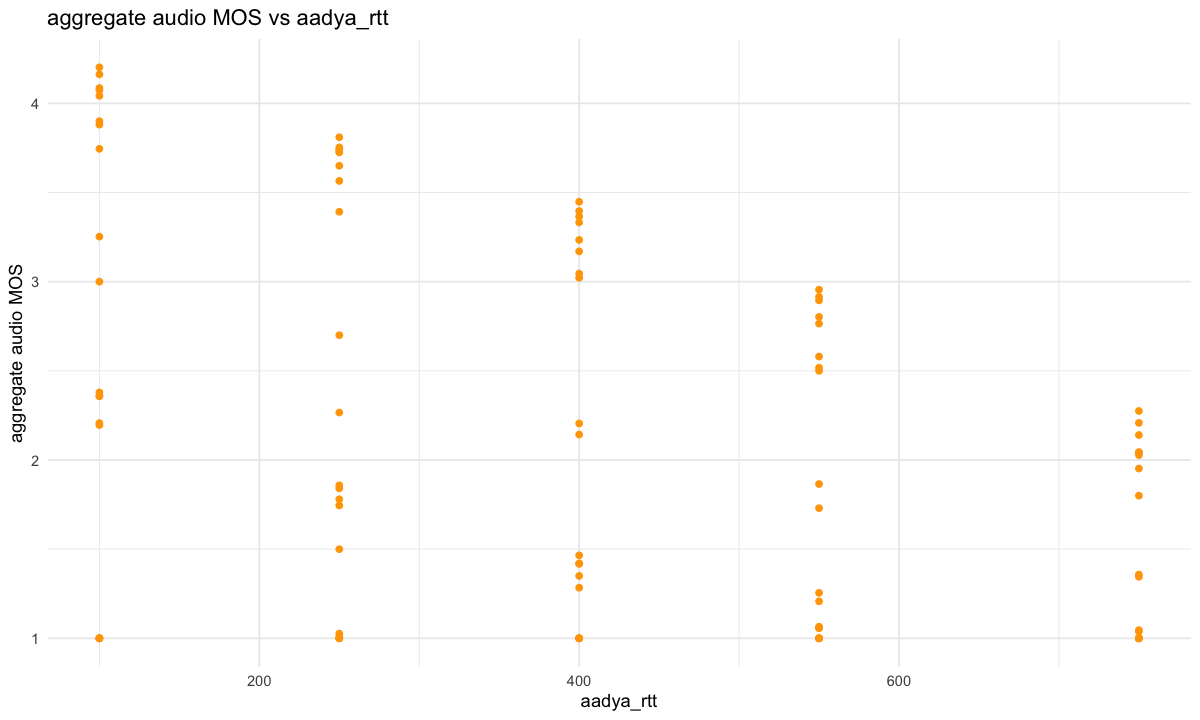

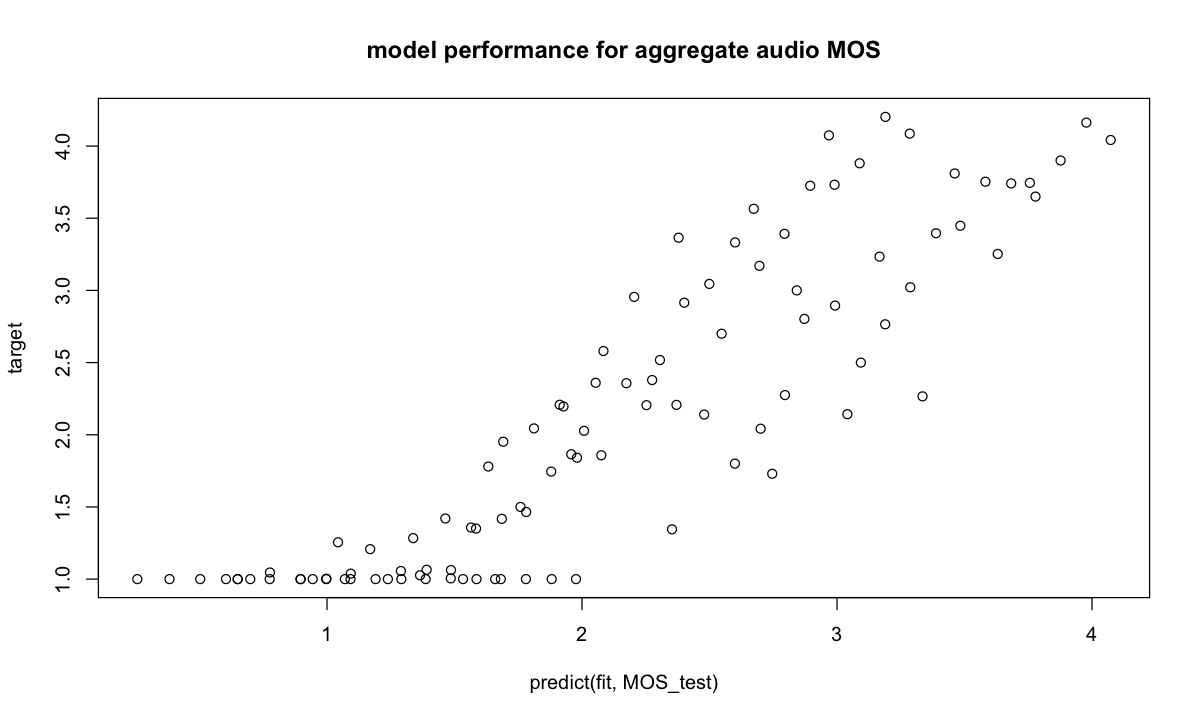

In [12]:
plot_vars_against_targ(MOS_test$agg_audio_MOS, "aggregate audio MOS")


Call:
lm(formula = target ~ log(aadya_up) + log(aadya_down) + aadya_rtt, 
    data = MOS_test)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2960 -0.3322 -0.1404  0.4222  1.5197 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3.3692214  0.5323978  -6.328 7.89e-09 ***
log(aadya_up)    0.6617061  0.0369690  17.899  < 2e-16 ***
log(aadya_down)  0.0688938  0.0464747   1.482    0.142    
aadya_rtt       -0.0002456  0.0002337  -1.051    0.296    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5299 on 96 degrees of freedom
Multiple R-squared:  0.7713,	Adjusted R-squared:  0.7641 
F-statistic: 107.9 on 3 and 96 DF,  p-value: < 2.2e-16



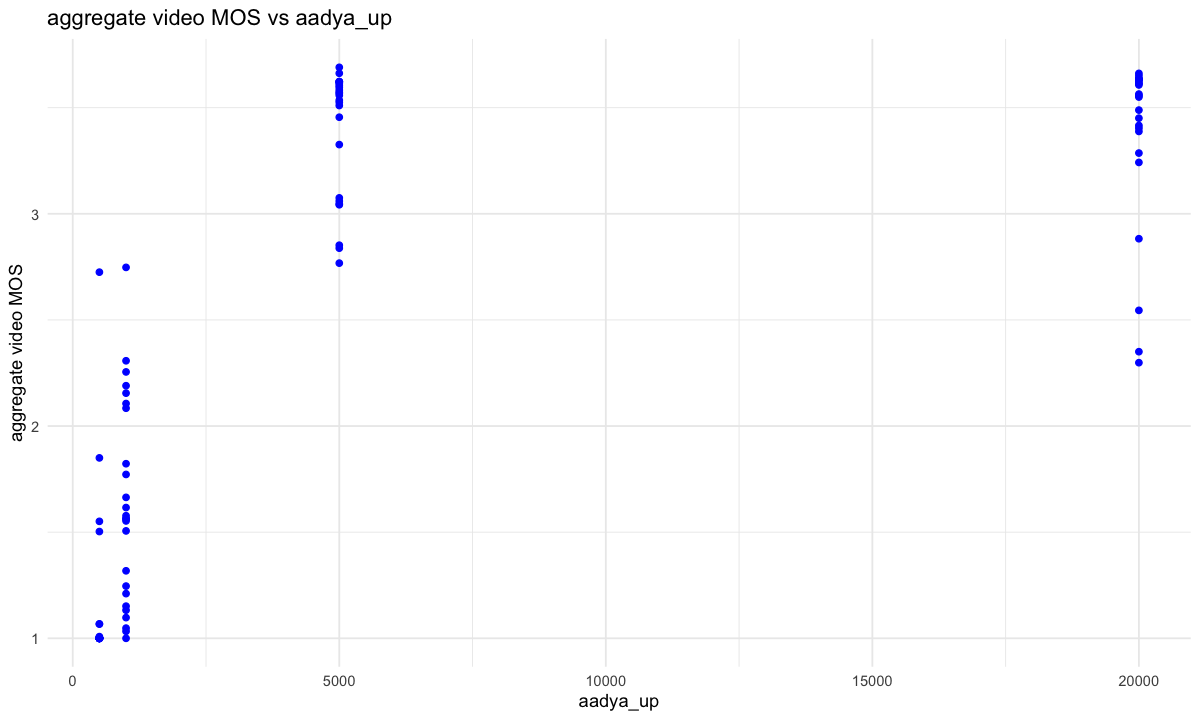

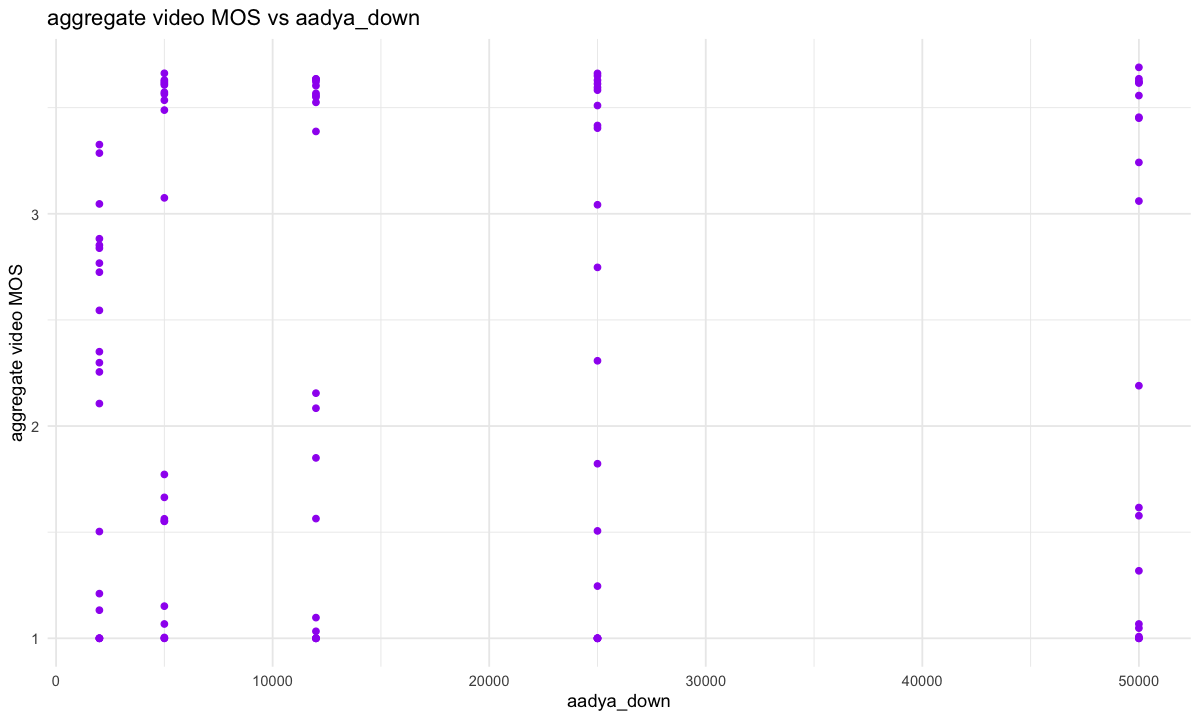

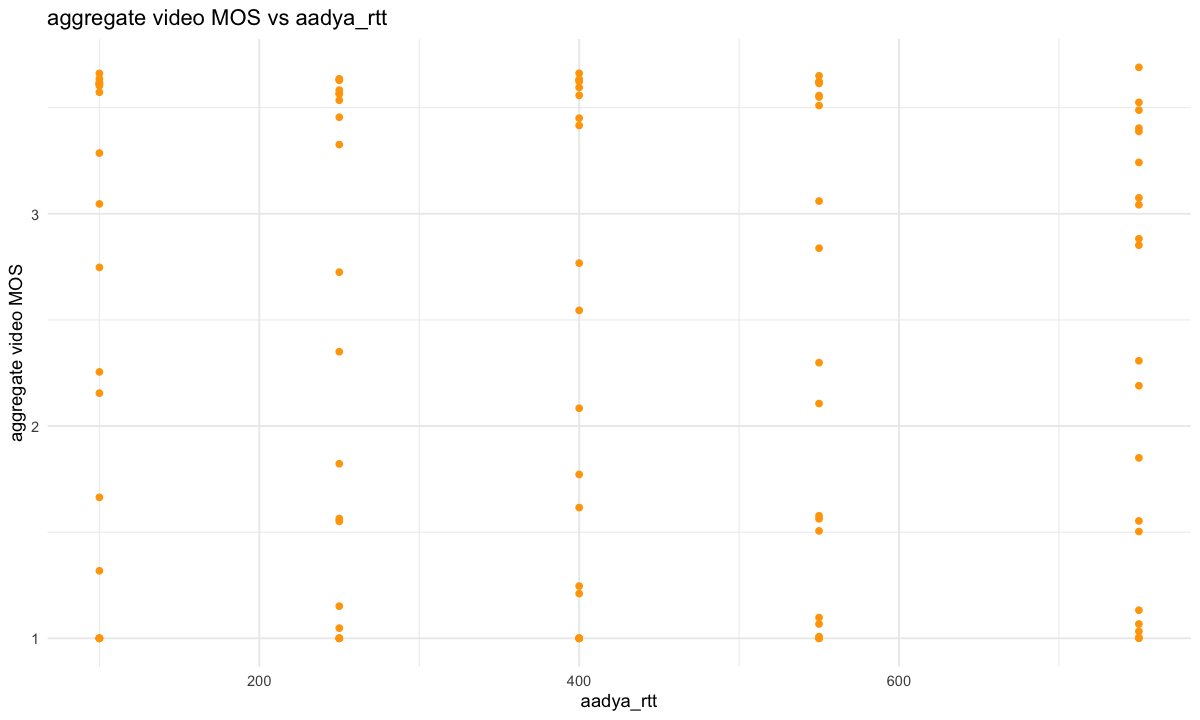

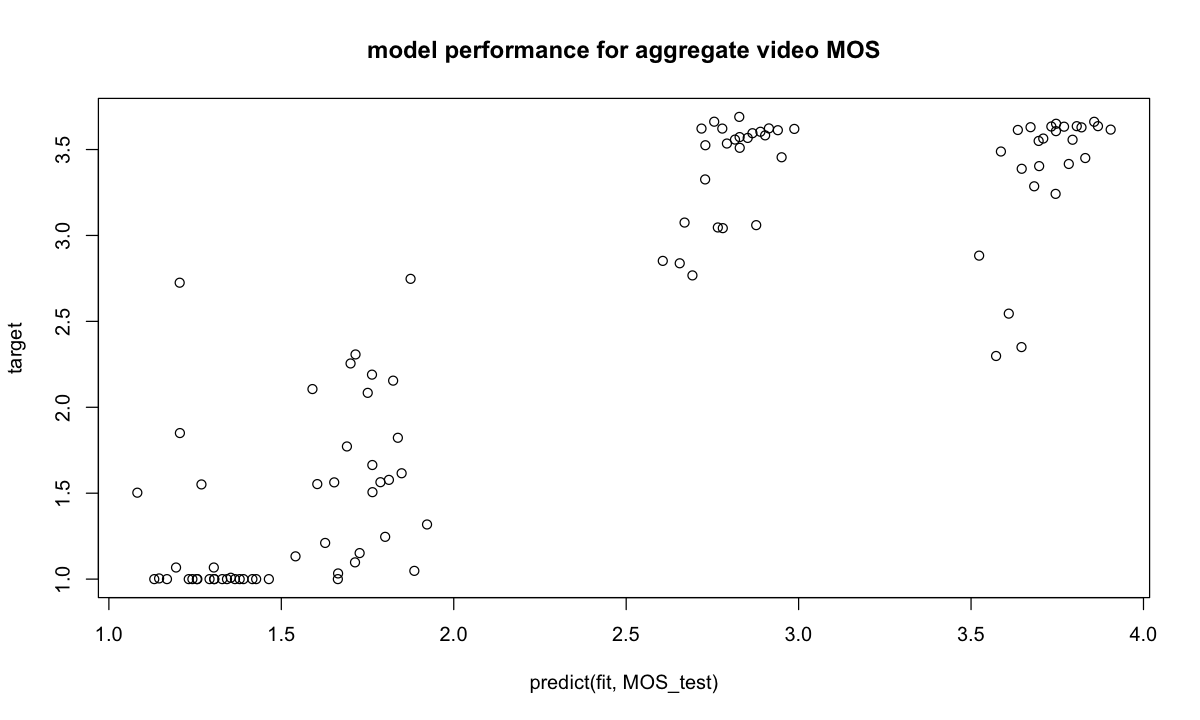

In [13]:
plot_vars_against_targ(MOS_test$agg_video_MOS, "aggregate video MOS")


Call:
lm(formula = target ~ log(aadya_up) + log(aadya_down) + aadya_rtt, 
    data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22053 -0.21822  0.00486  0.33446  0.89220 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.6203093  0.4605622  -3.518 0.000666 ***
log(aadya_up)    0.4605180  0.0319808  14.400  < 2e-16 ***
log(aadya_down)  0.1232328  0.0402040   3.065 0.002825 ** 
aadya_rtt       -0.0014263  0.0002022  -7.054 2.69e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4584 on 96 degrees of freedom
Multiple R-squared:  0.7352,	Adjusted R-squared:  0.7269 
F-statistic: 88.84 on 3 and 96 DF,  p-value: < 2.2e-16



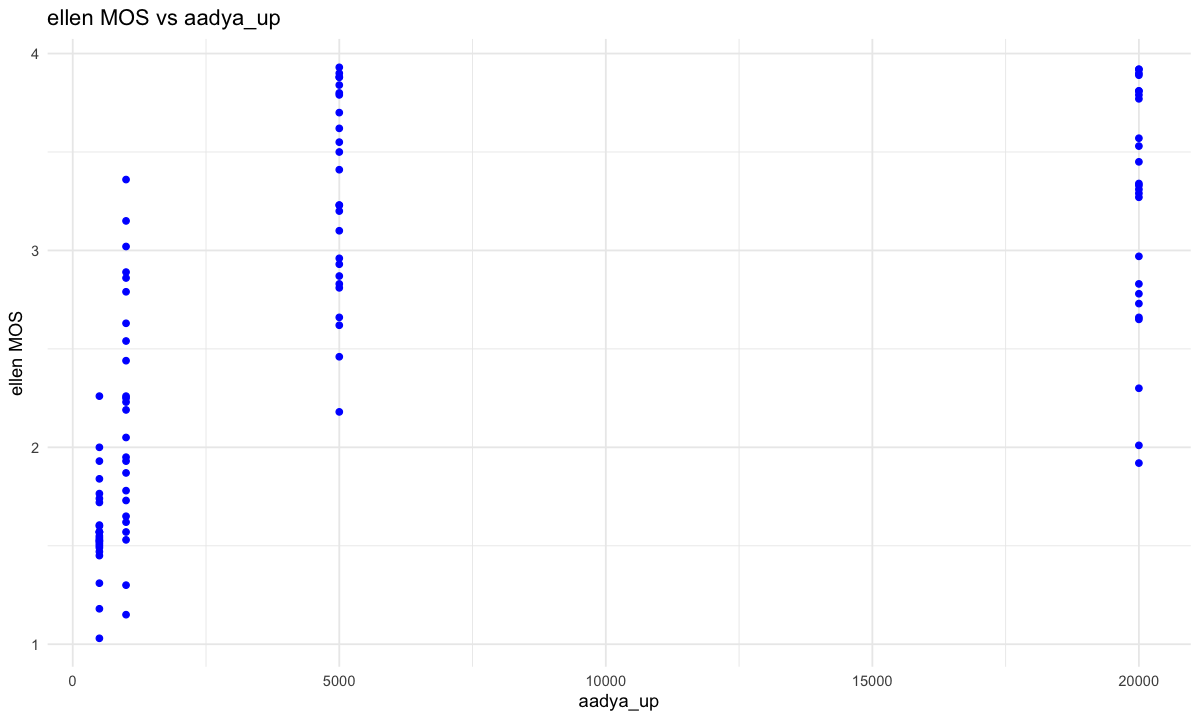

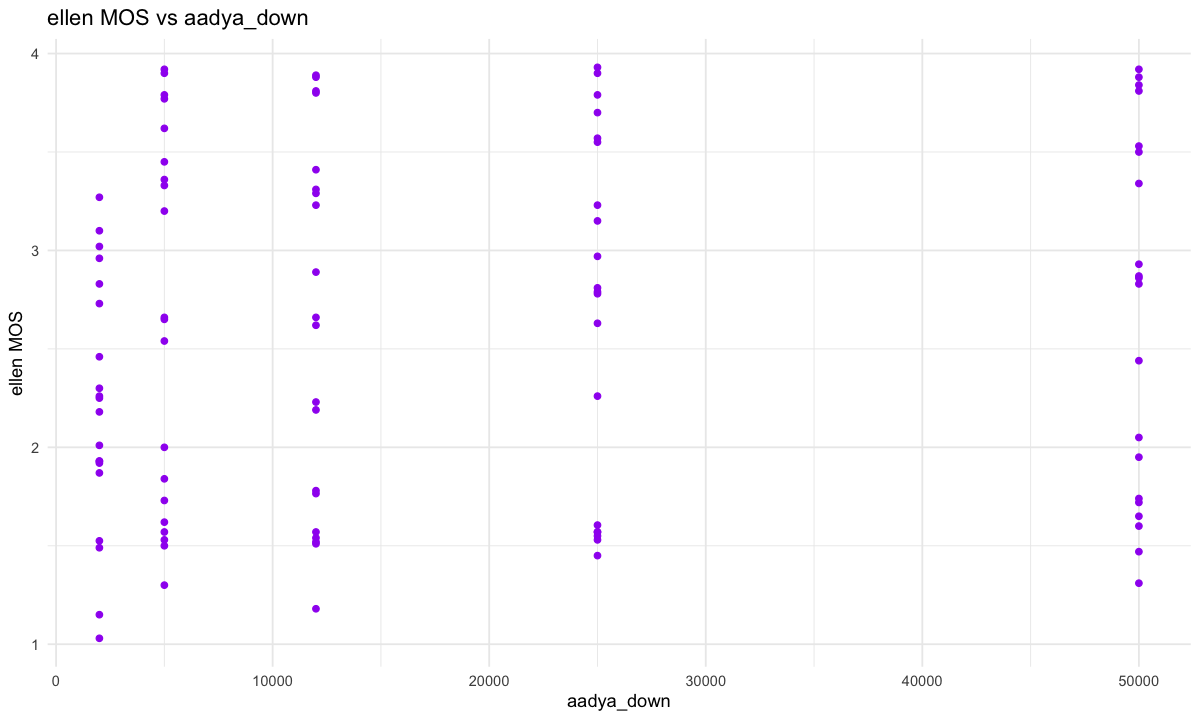

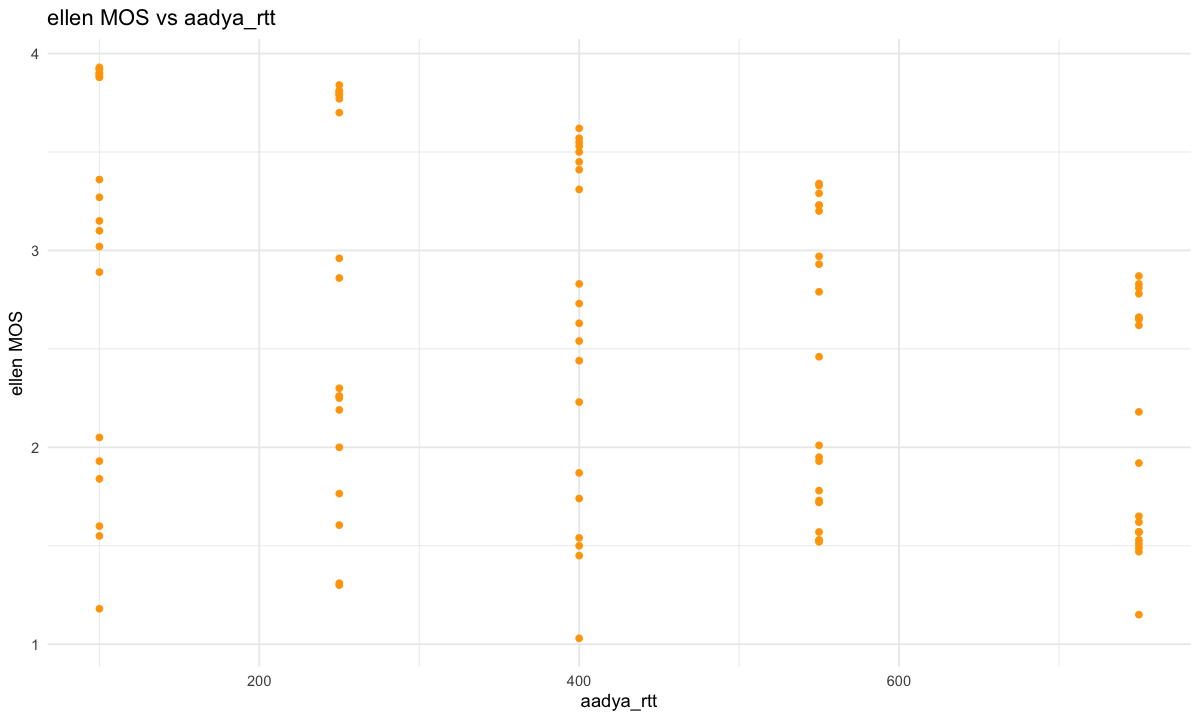

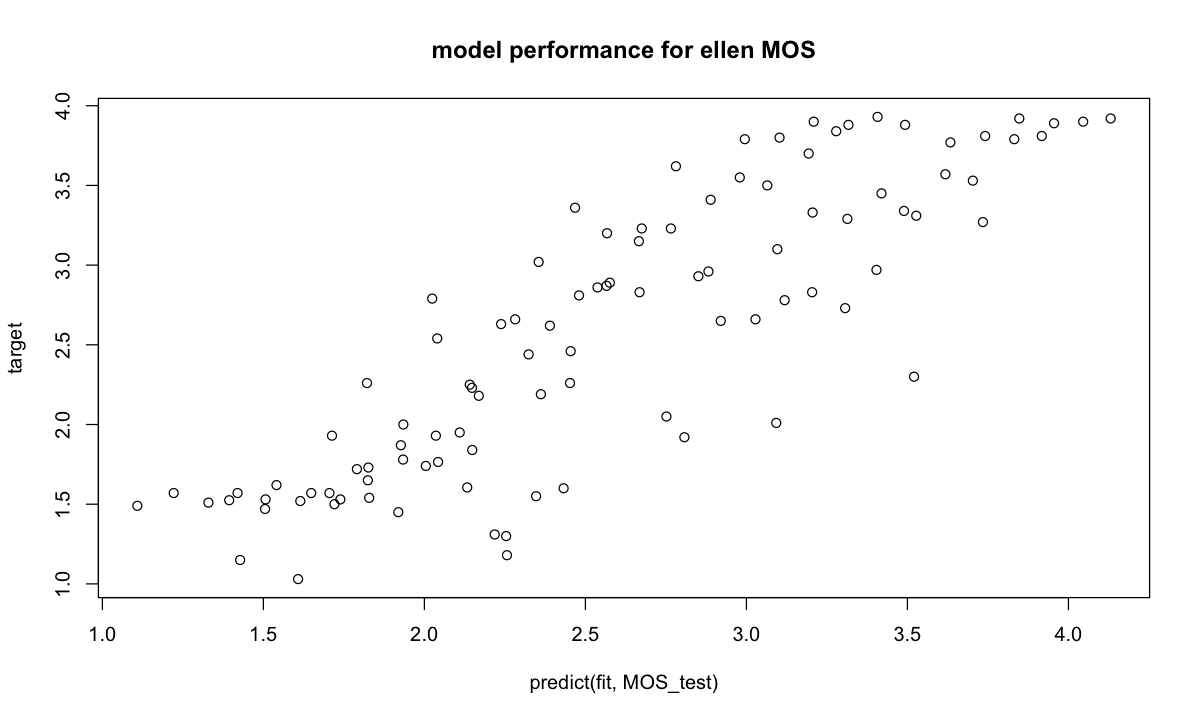

In [14]:
plot_vars_against_targ(MOS_test$ellen_MOS, "ellen MOS")


Call:
lm(formula = target ~ log(aadya_up) + log(aadya_down) + aadya_rtt, 
    data = MOS_test)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20017 -0.28554 -0.05759  0.27967  0.88487 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3.0630361  0.4683857  -6.540 2.99e-09 ***
log(aadya_up)    0.6277248  0.0325241  19.300  < 2e-16 ***
log(aadya_down)  0.0929468  0.0408869   2.273   0.0252 *  
aadya_rtt       -0.0012362  0.0002056  -6.012 3.31e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4662 on 96 degrees of freedom
Multiple R-squared:  0.8117,	Adjusted R-squared:  0.8058 
F-statistic: 137.9 on 3 and 96 DF,  p-value: < 2.2e-16



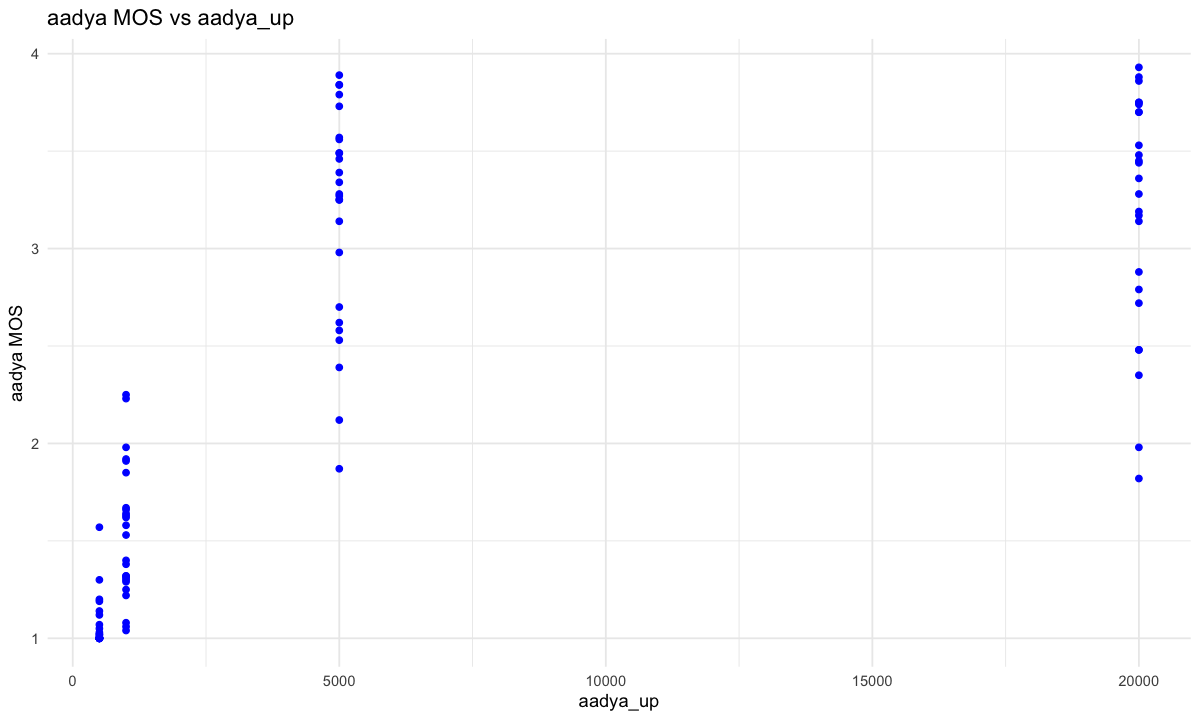

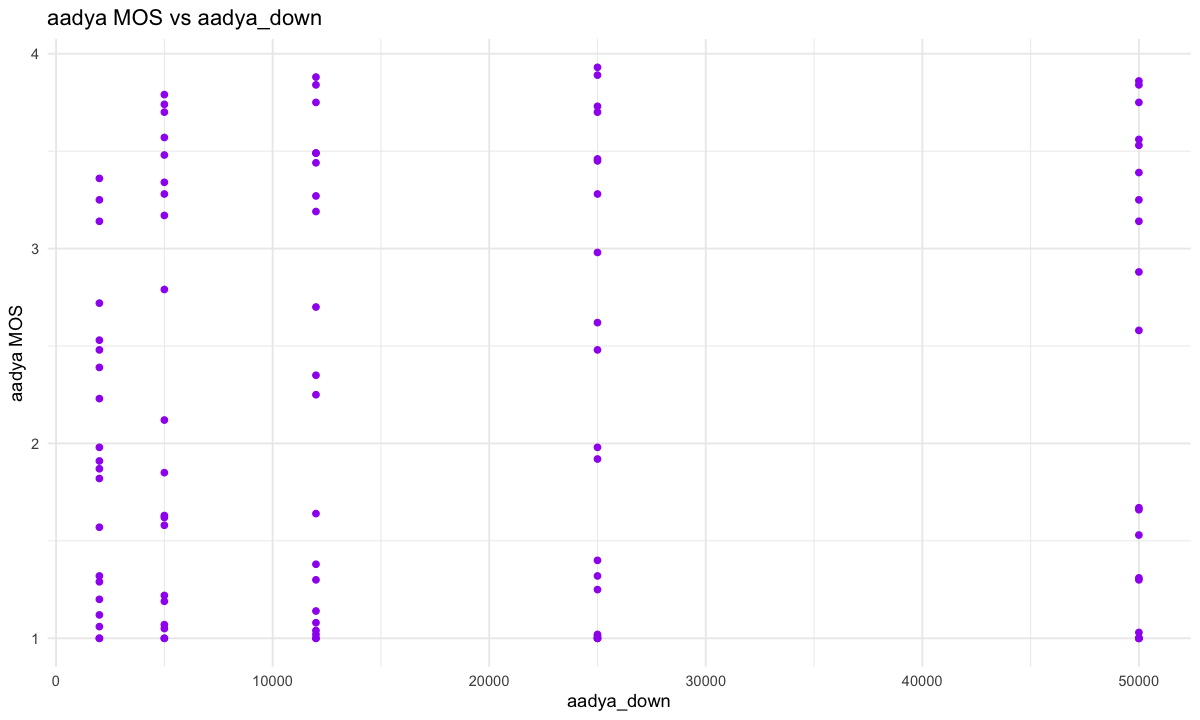

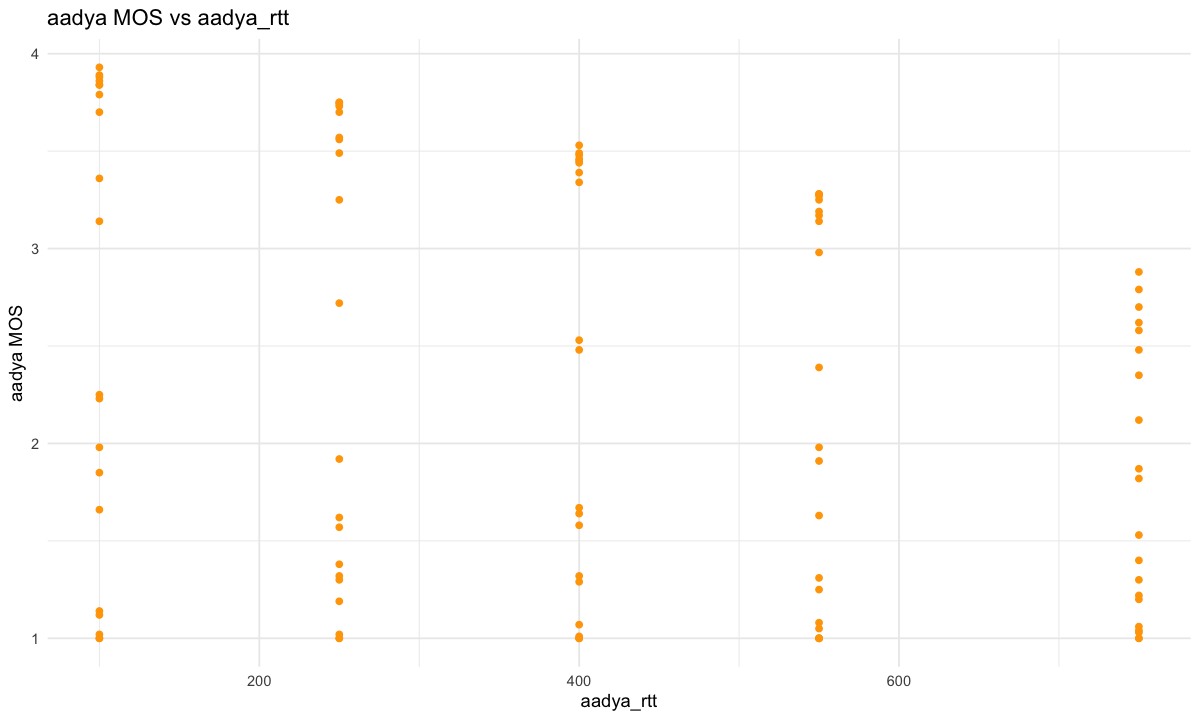

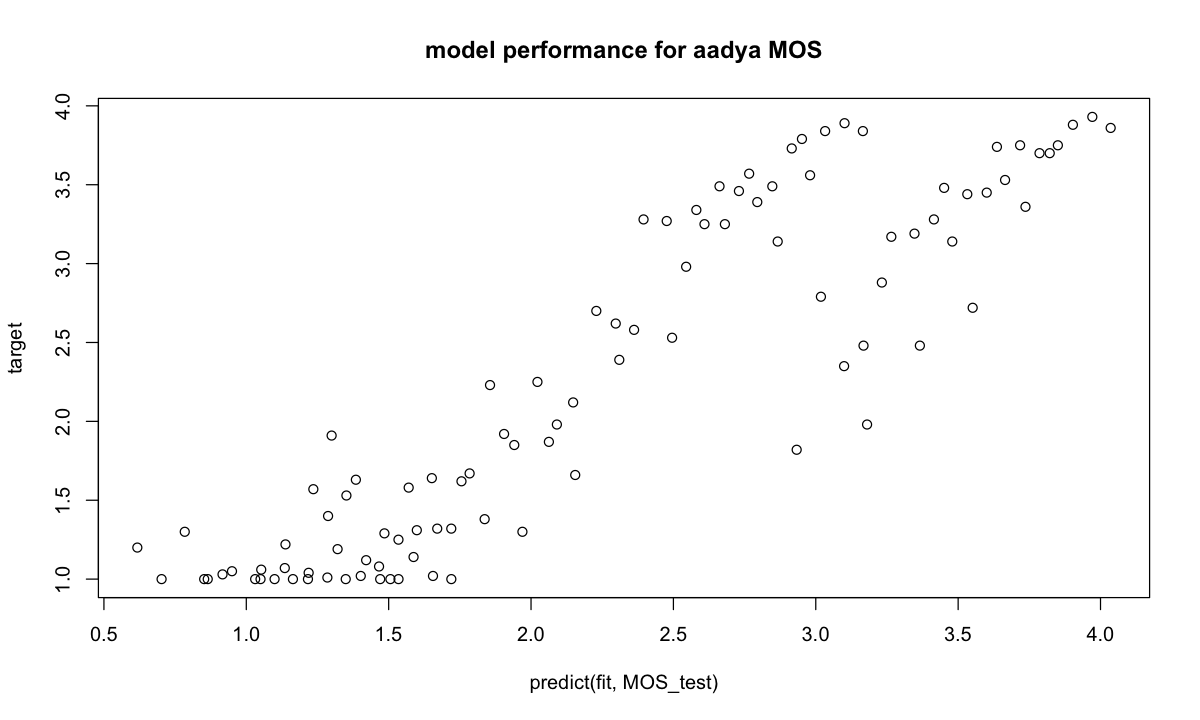

In [45]:
plot_vars_against_targ(MOS_test$aadya_MOS, "aadya MOS")

# Logistic Regression

I'm not sure if this is right but I think if MOS is categorical it should be something like this

In [ ]:
library(nnet)

# Fit the logistic regression model
model <- multinom(AGG_MOST ~ up + down + rtt, data = MOS_test)
summary(model)
# Get predictions
predictions <- predict(model, MOS_test, type = "probs")
print(prediction)